## Looking at the Synthetic Data

In [1]:
import numpy as np 
from metrics.discriminative_metrics import discriminative_score_metrics
from metrics.predictive_metrics import predictive_score_metrics
from metrics.visualization_metrics import visualization
from shared.component_logger import component_logger as logger

<frozen importlib._bootstrap>:228: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject


In [2]:
with open('data/stock_synthetic_data.npy', 'rb') as f:
    generated_data = np.load(f)

with open('data/stock_real_data.npy', 'rb') as f:
    ori_data = np.load(f)

logger.log(ori_data.shape)
logger.log(generated_data.shape)

2022-08-05 01:02:51.000689: INFO: time_series_gan_transformer: <cell line: 7>: (3621, 64, 6)
2022-08-05 01:02:51.010666: INFO: time_series_gan_transformer: <cell line: 8>: (3621, 64, 6)


## Evaluate Synthetic Data

### 1. Visualization

We visualize the original and synthetic data distributions using PCA and tSNE analysis for **Diversity**.

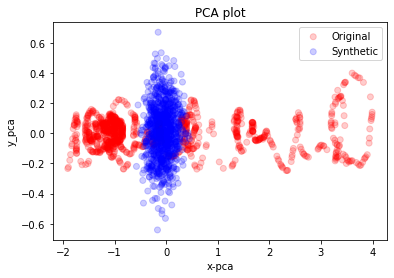

D:\conda\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
D:\conda\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 2000 samples in 0.000s...
[t-SNE] Computed neighbors for 2000 samples in 0.082s...
[t-SNE] Computed conditional probabilities for sample 1000 / 2000
[t-SNE] Computed conditional probabilities for sample 2000 / 2000
[t-SNE] Mean sigma: 0.104087
[t-SNE] KL divergence after 250 iterations with early exaggeration: 80.522842
[t-SNE] KL divergence after 300 iterations: 1.673337


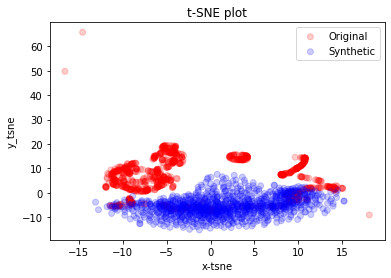

In [4]:
visualization(ori_data, generated_data, 'pca')
visualization(ori_data, generated_data, 'tsne')


### 2. Discriminative score
To evaluate the classification accuracy between original and synthetic data using post-hoc RNN network. The output is |classification accuracy - 0.5|.



*   metric_iteration: the number of iterations for metric computation.




In [12]:
metric_iteration = 5

discriminative_score = list()
for _ in range(metric_iteration):
    temp_disc = discriminative_score_metrics(ori_data, generated_data)
    discriminative_score.append(temp_disc)

logger.log('Discriminative score: ' + str(np.round(np.mean(discriminative_score), 4)))

/content/TimeGAN/metrics/discriminative_metrics.py:81: UserWarning: `tf.nn.rnn_cell.GRUCell` is deprecated and will be removed in a future version. This class is equivalent as `tf.keras.layers.GRUCell`, and will be replaced by that in Tensorflow 2.0.
  d_cell = tf1.nn.rnn_cell.GRUCell(num_units=hidden_dim, activation=tf.nn.tanh, name = 'd_cell')
/usr/local/lib/python3.7/dist-packages/keras/layers/legacy_rnn/rnn_cell_impl.py:573: UserWarning: `layer.add_variable` is deprecated and will be removed in a future version. Please use `layer.add_weight` method instead.
  initializer=self._kernel_initializer)
/usr/local/lib/python3.7/dist-packages/keras/layers/legacy_rnn/rnn_cell_impl.py:579: UserWarning: `layer.add_variable` is deprecated and will be removed in a future version. Please use `layer.add_weight` method instead.
  tf.compat.v1.constant_initializer(1.0, dtype=self.dtype)))
/usr/local/lib/python3.7/dist-packages/keras/layers/legacy_rnn/rnn_cell_impl.py:583: UserWarning: `layer.add_va

Discriminative score: 0.4674


### 3. Predictive score
To evaluate the prediction performance on train on synthetic, test on real setting. More specifically, we use Post-hoc RNN architecture to predict one-step ahead and report the performance in terms of MAE.

In [13]:
predictive_score = list()
for tt in range(metric_iteration):
    temp_pred = predictive_score_metrics(ori_data, generated_data)
    predictive_score.append(temp_pred)   

logger.log('Predictive score: ' + str(np.round(np.mean(predictive_score), 4)))

/content/TimeGAN/metrics/predictive_metrics.py:72: UserWarning: `tf.nn.rnn_cell.GRUCell` is deprecated and will be removed in a future version. This class is equivalent as `tf.keras.layers.GRUCell`, and will be replaced by that in Tensorflow 2.0.
  p_cell = tf1.nn.rnn_cell.GRUCell(num_units=hidden_dim, activation=tf.nn.tanh, name = 'p_cell')
/usr/local/lib/python3.7/dist-packages/keras/layers/legacy_rnn/rnn_cell_impl.py:573: UserWarning: `layer.add_variable` is deprecated and will be removed in a future version. Please use `layer.add_weight` method instead.
  initializer=self._kernel_initializer)
/usr/local/lib/python3.7/dist-packages/keras/layers/legacy_rnn/rnn_cell_impl.py:579: UserWarning: `layer.add_variable` is deprecated and will be removed in a future version. Please use `layer.add_weight` method instead.
  tf.compat.v1.constant_initializer(1.0, dtype=self.dtype)))
/usr/local/lib/python3.7/dist-packages/keras/layers/legacy_rnn/rnn_cell_impl.py:583: UserWarning: `layer.add_variab

Predictive score: 0.2895
